In [ ]:
"""
2.)Calculate the critical threshold fc for networks with Power law with exponential cutoff and
lognormal distribution. Assume that the networks are uncorrelated and infinite. Discuss the
consequences of the obtained results for network robustness by visualizing the network
through R script or Python script
"""

In [1]:
import networkx as nx
import math
import numpy as np
from mpmath import polylog
import matplotlib.pyplot as plt
import random

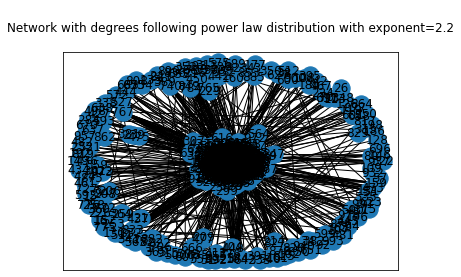

In [4]:
#Network with degrees following power law distribution
n = 1000                 #nodes
power_law_exponent = 2.2

s1 = nx.utils.powerlaw_sequence(n , power_law_exponent)      
G_powerlaw = nx.expected_degree_graph(s1, selfloops=False)
#pos = nx.spring_layout(G_powerlaw)
nx.draw_networkx(G_powerlaw, pos)       #plotting the graph
plt.title("\nNetwork with degrees following power law distribution with exponent=2.2\n")
plt.show()


In [5]:
def makePowerlawWithCutoff(alpha, kappa ):
        #Create a model function for a powerlaw distribution with exponential cutoff.
        C = polylog(alpha, math.exp(-1.0 / kappa))
        def p( k ):
            return (pow((k + 0.0), -alpha) * math.exp(-(k + 0.0) / kappa)) / C
        return p       


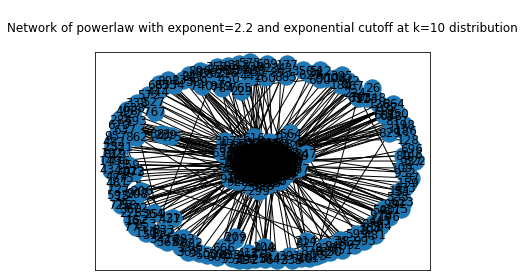

In [8]:
#Powerlaw With Cutoff Network(epydemic.NetworkGenerator):
N = 1000             #order of the network
alpha = 2.2         #exponent of the distribution
kappa = 10          #cutoff of the distribution
maxdeg = 100

p = makePowerlawWithCutoff(alpha, kappa)    #model function
  
#Generate a random graph with degree distribution described by the model function.
rng = np.random.default_rng()
ns = []
t = 0
for i in range(N):
    while True:
        k = rng.integers(1, maxdeg)         # draw a random degree
        if rng.random() < p(k):         # do we include a node with this degree?
            ns.append(k)            # yes, add it to the sequence; otherwise- draw again    
            t += k
            break
#the final sequence of degrees has to sum to an even number, as each edge has two endpoints if the          sequence is odd, remove an element and draw another from the distribution, repeating until the                 overall sequence is even..
while t % 2 != 0:
    i = rng.integers(0, len(ns) - 1) # pick a node at random            
    t -= ns[i]          # remove it from the sequence and from the total
    del ns[i]

        # choose a new node to replace the one we removed
    while True:
        k = rng.integers(1, maxdeg)        # draw a new degree from the distribution
        if rng.random() < p(k):
            ns.append(k)
            t += k
            break

# populate the network using the configuration model with the given degree distribution
G_powerlaw_withcutoff = nx.configuration_model(ns, create_using=nx.Graph())
#pos = nx.spring_layout(G_powerlaw_withcutoff)
nx.draw_networkx(G_powerlaw_withcutoff, pos)       #plotting the graph
plt.title("\nNetwork of powerlaw with exponent=2.2 and exponential cutoff at k=10 distribution\n")
plt.show()


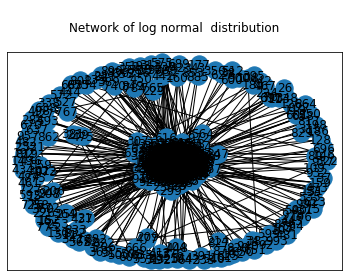

In [7]:
N=1000
lognormal_values = np.random.lognormal(size=N)

Glog_normal = nx.configuration_model(ns, create_using=nx.Graph())
#pos = nx.spring_layout(Glog_normal)
nx.draw_networkx(Glog_normal, pos)       #plotting the graph
plt.title("\nNetwork of log normal  distribution\n")
plt.show()


In [9]:
def remove_random_node(g, n):
    for i in range(n):
        node = random.choice(list(g.nodes.keys()))
        g.remove_node(node)
        return g

In [10]:
def robustness_plot(G):
    x=[]
    y=[]
    for i in range(1,11):
        g = remove_random_node(G,int((i/10)*n))
        Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
        G0 = g.subgraph(Gcc[0])
        yt = len(G0)         #𝑃∞(𝑓)/𝑃∞(0) Size of the gaint component
        y.append(yt)
        x.append((i/10))     #fraction of nodes removed...

    plt.plot(x,y)
    plt.xlabel("Fraction of nodes removed")
    plt.ylabel("Size of the giant component")#𝑃∞(𝑓)/𝑃∞(0)
    plt.show()


	Robustness of network that follows power law distribution at exponent 2.2



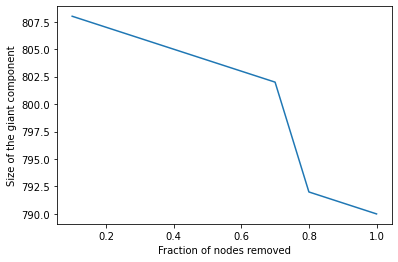

In [13]:
print("\tRobustness of network that follows power law distribution at exponent 2.2\n")
robustness_plot(G_powerlaw)

In [ ]:
#from the above plot we can find the critical threashold (fc) = 0.7

	Robustness of network that follows powerlaw distribution with cutoff at k-10 and exponent=2.2



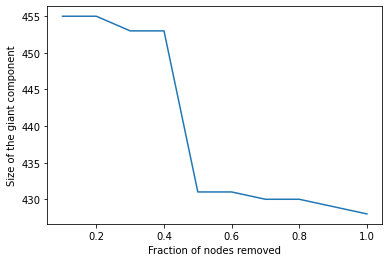

In [15]:
print("\tRobustness of network that follows powerlaw distribution with cutoff at k-10 and exponent=2.2\n")
robustness_plot(G_powerlaw_withcutoff)

In [ ]:
#from the above plot we can find the critical threashold (fc) = 0.5

	Robustness of network that follows lognorml distribution



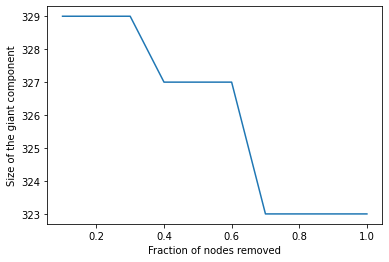

In [16]:
print("\tRobustness of network that follows lognorml distribution\n")
robustness_plot(Glog_normal)

In [ ]:
#from the above plot we can find the critical threashold (fc) = 0.6

In [ ]:
#Note:

#These plots indicate that scale-free networks do not fall apart after the removal of a finite fraction of nodes. We need to remove almost all nodes (i.e. fc=1) to fragment these networks.